In [33]:
import glob
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import torchaudio
import os
from IPython.display import Audio

In [2]:
# Show all wav files in test and train
test_directory = '../Dataset/Audio Dataset/Cats and Dogs/test_data'
test_files = sorted(glob.glob(os.path.join(test_directory, '*')))
train_directory = '../Dataset/Audio Dataset/Cats and Dogs/data'
train_files = sorted(glob.glob(os.path.join(train_directory, '*')))
print(test_files)
print(train_files)

['../Dataset/Audio Dataset/Cats and Dogs/test_data/cat_0.wav', '../Dataset/Audio Dataset/Cats and Dogs/test_data/cat_1.wav', '../Dataset/Audio Dataset/Cats and Dogs/test_data/cat_10.wav', '../Dataset/Audio Dataset/Cats and Dogs/test_data/cat_11.wav', '../Dataset/Audio Dataset/Cats and Dogs/test_data/cat_12.wav', '../Dataset/Audio Dataset/Cats and Dogs/test_data/cat_13.wav', '../Dataset/Audio Dataset/Cats and Dogs/test_data/cat_14.wav', '../Dataset/Audio Dataset/Cats and Dogs/test_data/cat_15.wav', '../Dataset/Audio Dataset/Cats and Dogs/test_data/cat_16.wav', '../Dataset/Audio Dataset/Cats and Dogs/test_data/cat_17.wav', '../Dataset/Audio Dataset/Cats and Dogs/test_data/cat_18.wav', '../Dataset/Audio Dataset/Cats and Dogs/test_data/cat_19.wav', '../Dataset/Audio Dataset/Cats and Dogs/test_data/cat_2.wav', '../Dataset/Audio Dataset/Cats and Dogs/test_data/cat_20.wav', '../Dataset/Audio Dataset/Cats and Dogs/test_data/cat_21.wav', '../Dataset/Audio Dataset/Cats and Dogs/test_data/cat_22.

### Sample Cat audio

In [3]:
print(test_files[0])
Audio(test_files[0])

../Dataset/Audio Dataset/Cats and Dogs/test_data/cat_0.wav


In [4]:

print(train_files[0])
Audio(train_files[0])

../Dataset/Audio Dataset/Cats and Dogs/data/cat_1.wav


### Sample Dog audio

In [5]:
print(test_files[50])
Audio(test_files[50])

../Dataset/Audio Dataset/Cats and Dogs/test_data/dog_0.wav


In [6]:
print(train_files[200])
Audio(train_files[200])

../Dataset/Audio Dataset/Cats and Dogs/data/dog_barking_3.wav


### Visualizing Waveform

Text(0, 0.5, 'Amplitude')

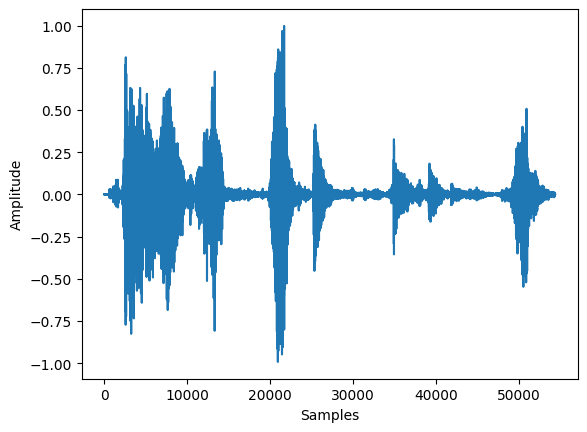

In [23]:
signal, sr = torchaudio.load(train_files[200])
signal = np.array(signal).squeeze(0)
plt.plot(np.arange(len(signal)), signal)
plt.xlabel('Samples')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Magnitude')

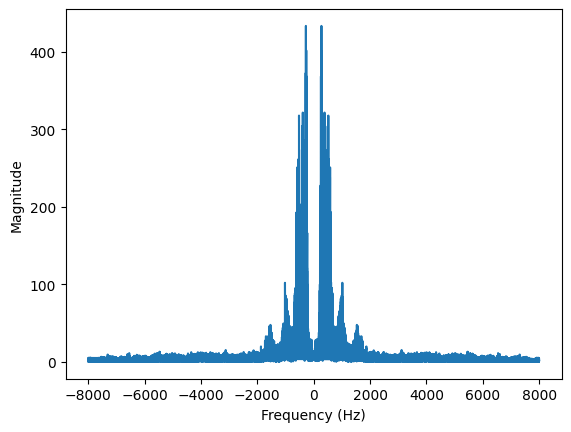

In [30]:
signal, sr = torchaudio.load(train_files[200])
signal = np.array(signal).squeeze(0)
result_fft = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), 1 / sr)  
plt.plot(frequencies, np.abs(result_fft))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")


### Sampling Rates and Length of audio

In [14]:
signal_lengths = []
signal_sr={}
all_files = train_files + test_files
for audio in all_files:
    signal, sr = librosa.load(audio)
    signal_lengths.append(len(signal))
    if sr not in signal_sr:
        signal_sr[sr]=0
    signal_sr[sr] += 1

print(signal_lengths)
print(np.average(signal_lengths))
print(signal_sr)

[246960, 207006, 28522, 253575, 251370, 264600, 262395, 264600, 264600, 42148, 129125, 264600, 28048, 396371, 109280, 182314, 321666, 262395, 244755, 185220, 95168, 246960, 44365, 91552, 118365, 139180, 23814, 175456, 264600, 231525, 251370, 122789, 242550, 27519, 34928, 334984, 30529, 27650, 26498, 130016, 22897, 27380, 20765, 256321, 20765, 20765, 87230, 222970, 110171, 264600, 264600, 264600, 92610, 65004, 46482, 86260, 260190, 264600, 224381, 42866, 46180, 132300, 34398, 264600, 154527, 264600, 262395, 264600, 264600, 225415, 251370, 260190, 264600, 33693, 28930, 28048, 264600, 38720, 260190, 227115, 231525, 70296, 257985, 103635, 52920, 264600, 264600, 257985, 264600, 290443, 55874, 92458, 192894, 242550, 264600, 264600, 141826, 238140, 35457, 264600, 240345, 264600, 264600, 264600, 382347, 255780, 264600, 260190, 264600, 264600, 262395, 264600, 56448, 26119, 23914, 20360, 25445, 264600, 264600, 264600, 253575, 298945, 213885, 264600, 264600, 257985, 209475, 62799, 21709, 52058, 3

### Spectrogram and Mel-Spectrogram

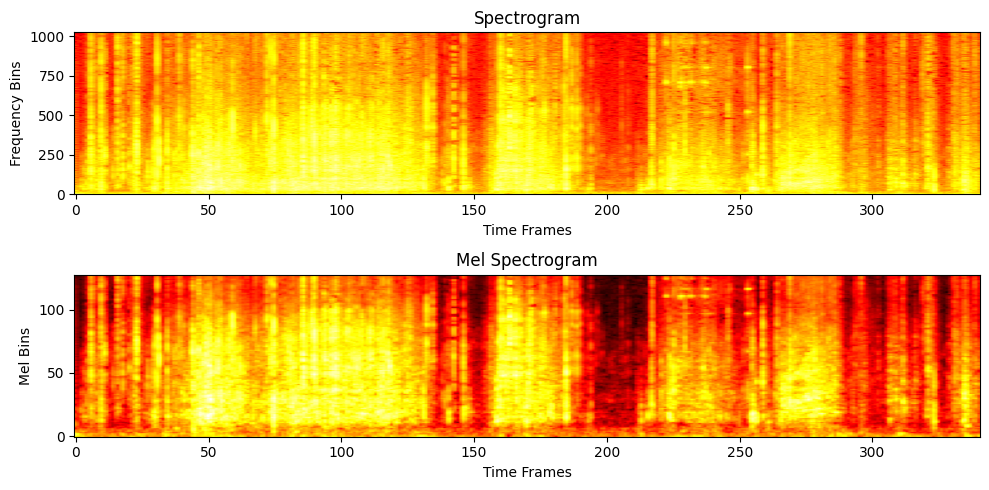

In [39]:
waveform, sample_rate = torchaudio.load(train_files[100])

spectrogram_transform = torchaudio.transforms.Spectrogram()(waveform)
mel_spectrogram_transform = torchaudio.transforms.MelSpectrogram(sample_rate=sample_rate)(waveform)

# Get decibel scale
spectrogram_db = torchaudio.transforms.AmplitudeToDB()(spectrogram)
mel_spectrogram_db = torchaudio.transforms.AmplitudeToDB()(mel_spectrogram)

fig, axs = plt.subplots(2, 1, figsize=(10, 5))

# Spectrogram
axs[0].imshow(spectrogram_db[0], cmap='hot', aspect='auto', origin='lower')
axs[0].set_title('Spectrogram')
axs[0].set_xlabel('Time Frames')
axs[0].set_ylabel('Frequency Bins')

# Mel Spectrogram
axs[1].imshow(mel_spectrogram_db[0], cmap='hot', aspect='auto', origin='lower')
axs[1].set_title('Mel Spectrogram')
axs[1].set_xlabel('Time Frames')
axs[1].set_ylabel('Mel Bins')
plt.tight_layout()
plt.show()
